In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Importing Dataset
It’s a good idea to make a copy of the original dataset and work with the copy because we’ll be doing a lot of modifications to the original one.


In [2]:
data = pd.read_csv("auto-mpg.csv")
df = data.copy()

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.shape

(398, 9)

In [5]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [6]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
df.drop(['model year','origin','car name'], axis=1, inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130,3504,12.0
1,15.0,8,350.0,165,3693,11.5
2,18.0,8,318.0,150,3436,11.0
3,16.0,8,304.0,150,3433,12.0
4,17.0,8,302.0,140,3449,10.5


# Data Wrangling

Data wrangling (known as data munging or preprocessing) is a key component of any data science project. Wrangling is a process where one transforms “raw” data for making it more suitable for analysis and it will improve the quality of your data.

1. Data Exploration: Checking for feature data types, unique values, and describing data.
2. Null Values: Counting null values and deciding what to do with them. 
3. Reshaping: This step transforms raw data into a more useful format. 
4. Remove Duplicates

By dropping null values, filtering and selecting the right data, and working with timeseries, you can ensure that any machine learning or treatment you apply to your cleaned-up data is fully effective

In [8]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
dtype: int64

In [9]:
# Since the horsepower has the six null values. Let's  see how they are presented

df[df['horsepower'].str.isnumeric()==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration
32,25.0,4,98.0,?,2046,19.0
126,21.0,6,200.0,?,2875,17.0
330,40.9,4,85.0,?,1835,17.3
336,23.6,4,140.0,?,2905,14.3
354,34.5,4,100.0,?,2320,15.8
374,23.0,4,151.0,?,3035,20.5


In [10]:
df['horsepower'].replace('?',np.nan)

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: object

In [11]:
df['horsepower'] = pd.to_numeric(df['horsepower'],errors='coerce')
df['horsepower'].fillna(df['horsepower'].median(),inplace=True)

# Exploratory Data Analysis

Exploratory Data Analysis(EDA): Exploratory data analysis is a complement to inferential statistics, which tends to be fairly rigid with rules and formulas. At an advanced level, EDA involves looking at and describing the data set from different angles and then summarizing it.

1. Outlier Treatment
2. Normalizing and Scaling( Numerical Variables)
3. Encoding Categorical variables( Dummy Variables)
4. Bivariate Analysis
5. Feature Engineering: Examples of feature engineering include one-hot encoding, aggregation, joins and grouping.

## Numerical Data Distribution

In [12]:
df_corr = df.corr()['mpg']
df_golden_features = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
df_golden_features

mpg             1.000000
horsepower     -0.773453
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64

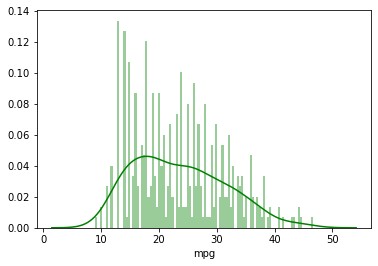

In [13]:
sns.distplot(df['mpg'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [14]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('int64')]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2b1db6130>,
      dtype=object)

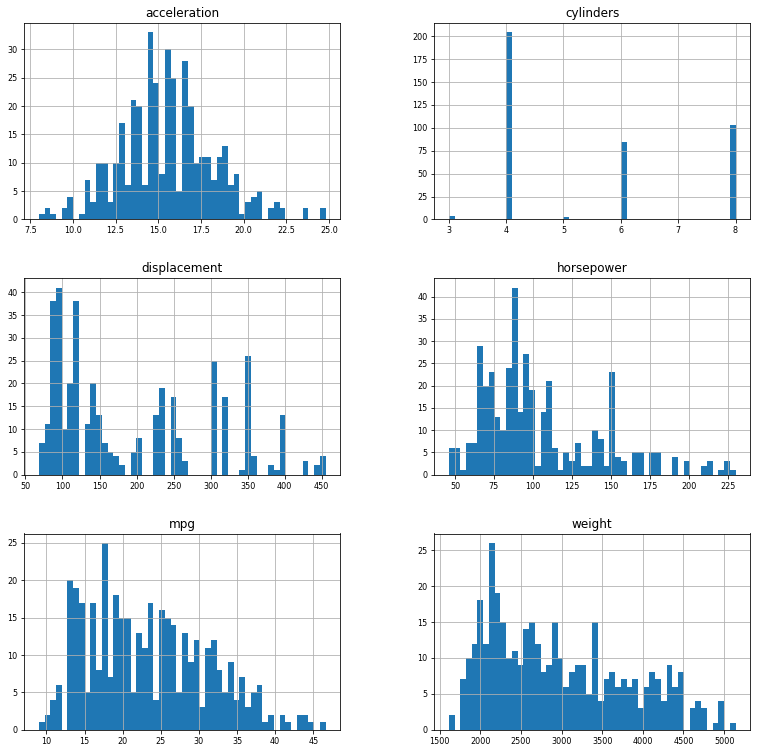

In [15]:
df.hist(figsize=(13, 13), bins=50, xlabelsize=8, ylabelsize=8)

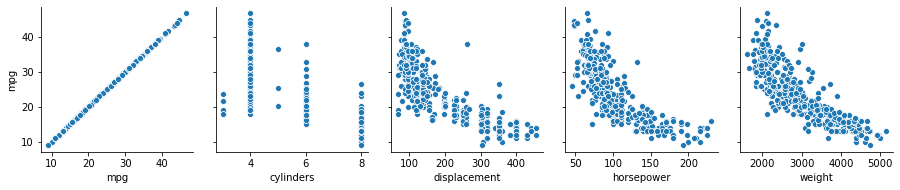

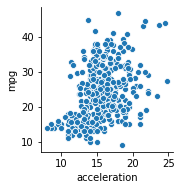

In [16]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+5],
                y_vars=['mpg'])

## Feature To Feature Relationship

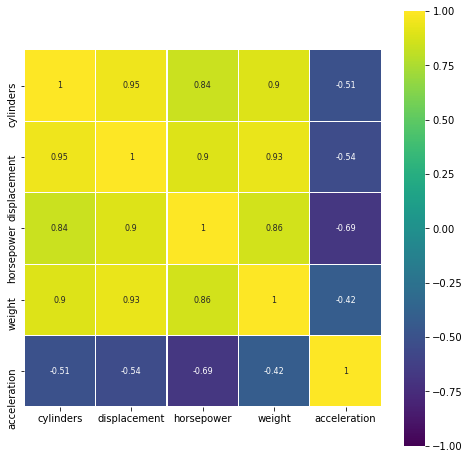

In [17]:
corr = df.drop(['mpg'],axis=1).corr()
plt.figure(figsize=(8, 8))

sns.heatmap(corr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);


In [18]:
features = df.columns.tolist()
features

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

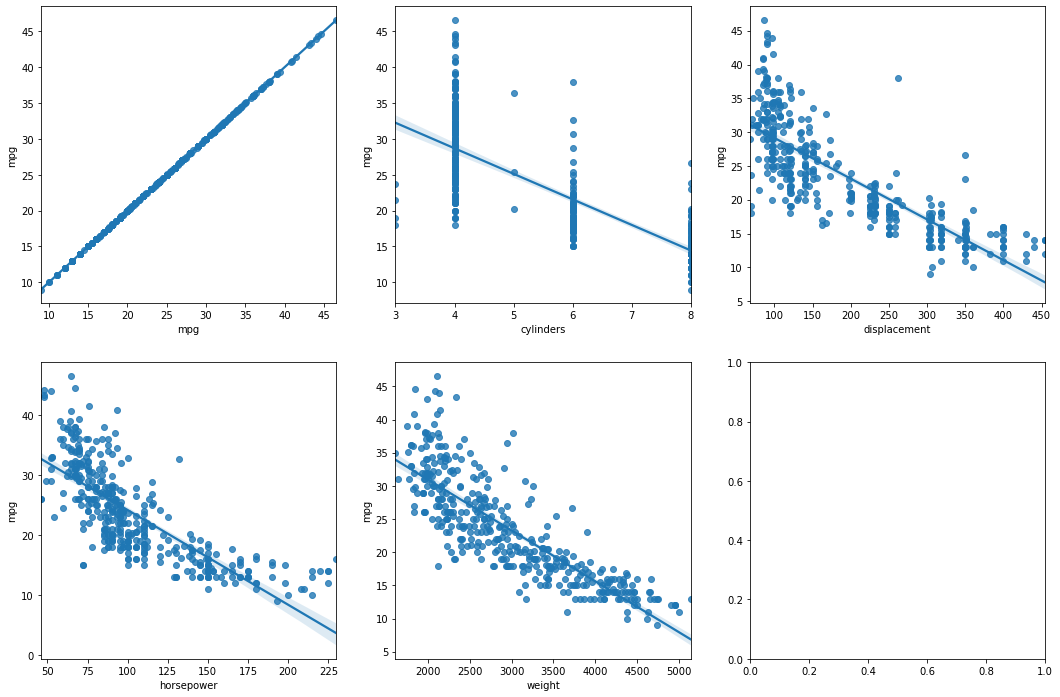

In [19]:
fig, ax = plt.subplots(round(len(features) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features) - 1:
        sns.regplot(x=features[i],y='mpg', data=df[features], ax=ax)

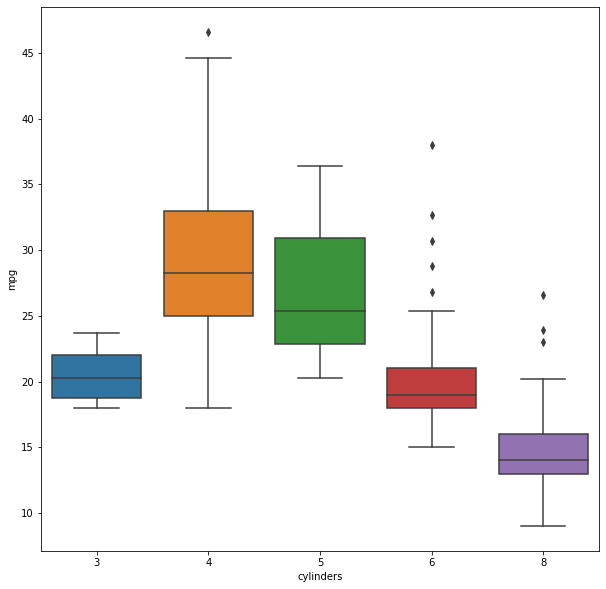

In [20]:
plt.figure(figsize = (10, 10))
ax = sns.boxplot(x=df['cylinders'], y=df['mpg'], data=df)

In [21]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5


# Model Building

In [32]:
# lets build our linear model

# independant variables
X = df.drop(['mpg'], axis=1)

# the dependent variable
y = df[['mpg']]

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)



In [35]:
regr = LinearRegression()

regr.fit(X_train, y_train)
y_predict = regr.predict(X_test)

print(regr.score(X_train,y_train))

0.6872523551536476


In [41]:
poly = PolynomialFeatures(degree=4, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_regr = LinearRegression()

poly_regr.fit(X_train2, y_train)

y_pred = poly_regr.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!

print(poly_regr.score(X_train2, y_train))


0.7926819577192343


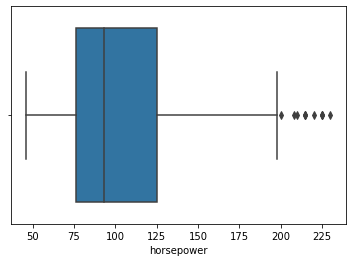

In [42]:
sns.boxplot(df['horsepower'])

In [43]:
#Removing the outliers
df['horsepower'] = np.log(df['horsepower'])

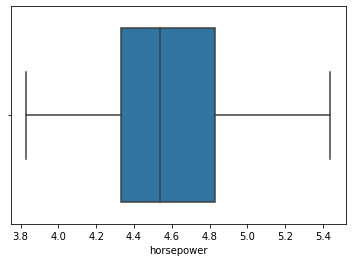

In [44]:
sns.boxplot(df['horsepower'])

In [45]:
# lets build our linear model

# independant variables
X = df.drop(['mpg'], axis=1)

# the dependent variable
y = df[['mpg']]

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


In [46]:
regr = LinearRegression()

regr.fit(X_train, y_train)
y_predict = regr.predict(X_test)

print(regr.score(X_train,y_train))

0.7166732044880579


In [53]:
poly = PolynomialFeatures(degree=5, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_regr = LinearRegression()

poly_regr.fit(X_train2, y_train)

y_pred = poly_regr.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!

print(poly_regr.score(X_train2, y_train))


0.7930205601536056
